## Baseline Model Training – Notebook Overview

This notebook serves as a starting point for evaluating predictive performance using two simple regression models:  
- **Linear Regression** (as a statistical baseline)  
- **Random Forest Regressor** (as a basic tree-based baseline)

The goal is to establish reference scores for comparison with more advanced models (e.g., XGBoost, CatBoost) later in the pipeline.

### Dataset Splitting Strategy
The dataset is first split into **features (`X`)** and **target (`y`)**, then partitioned into:
- **Training set (80%)** – used to train the model  
- **Testing set (20%)** – held out to evaluate generalization

This split is performed using `train_test_split` from `sklearn.model_selection` with a fixed `random_state` to ensure reproducibility.

### Models Trained
1. **Linear Regression**  
   - A simple model that assumes a linear relationship between inputs and the target.
   - Useful to detect underfitting or feature quality issues.

2. **Random Forest Regressor**  
   - An ensemble of decision trees that typically performs better than linear models by capturing nonlinear patterns.
   - Provides a stronger, but still untuned, performance baseline.

### Evaluation Metrics
Both models are evaluated using:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R<sup>2</sup> Score (Coefficient of Determination)**

These metrics give an initial understanding of how well the models fit the data.  
All future models in the pipeline should **outperform these baselines** to justify their added complexity.

---


# Load the preprocesed ML file


In [1]:
import sys, os

# Add the project root to the Python path
project_root = os.path.abspath("../..")
sys.path.append(project_root)

# Imports from local modules
import pandas as pd
from utils.data_cleaner import DataCleaner
from utils.data_loader import DataLoader
from utils.constants import  ML_READY_DATA_FILE

# Import standard libraries
from sklearn.model_selection import train_test_split

# Load the dataset
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

df.head(10)


,bedroomCount,bathroomCount,postCode,habitableSurface,buildingConstructionYear,facedeCount,toiletCount,is_big_property,room_count,surface_per_room,...,epcScore_A++,epcScore_B,epcScore_C,epcScore_D,epcScore_E,epcScore_F,epcScore_G,hasLivingRoom,hasTerrace,price
0,2.0,1.0,1040.0,100.0,2004.0,1.0,1.0,0.0,3.0,33.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,399000.0
1,4.0,2.0,1040.0,270.0,1910.0,2.0,3.0,0.0,6.0,45.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,895000.0
2,2.0,1.0,1040.0,87.0,1970.0,2.0,1.0,0.0,3.0,29.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,465000.0
3,1.0,1.0,1040.0,71.0,1906.0,2.0,1.0,0.0,2.0,35.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,289000.0
4,2.0,1.0,1040.0,90.0,1958.0,2.0,1.0,0.0,3.0,30.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,375000.0
5,3.0,2.0,1040.0,220.0,2023.0,2.0,4.0,0.0,5.0,44.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,950000.0
6,3.0,2.0,1040.0,220.0,2023.0,2.0,4.0,0.0,5.0,44.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,950000.0
7,1.0,1.0,1040.0,93.0,1947.0,2.0,1.0,0.0,2.0,46.500000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,297000.0
8,2.0,1.0,1040.0,120.0,1932.0,2.0,1.0,0.0,3.0,40.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,435000.0
9,3.0,1.0,1040.0,119.0,1944.0,2.0,1.0,0.0,4.0,29.750000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,370000.0


# Dataset Splitting Strategy

In this step, we split the full dataset into:
- **Features (`X`)**: all columns except the target variable (`price`)
- **Target (`y`)**: the column we want to predict (here, `price`)

We use `train_test_split` from `sklearn.model_selection` to divide the data into:
- **Training set (80%)** — used to train the model
- **Testing set (20%)** — used to evaluate performance on unseen data

The `random_state=42` ensures that the split is reproducible.  
Shapes of the resulting datasets are displayed for quick verification.


In [2]:
# Define features and target
# Replace 'price' with your actual target column name if different
X = df.drop(columns=["price"])
y = df["price"]

# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Show shape for verification
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16111, 2892)
X_test shape: (4028, 2892)
y_train shape: (16111,)
y_test shape: (4028,)


### Linear Regression Model – Training & Evaluation

In this step, we train a **Linear Regression** model on the training set to establish a simple statistical baseline.

The process includes:
- **Model initialization and training** using `LinearRegression()` from scikit-learn.
- **Prediction** on the test set to evaluate generalization performance.
- **Evaluation** using:
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
  - R-squared score (R<sup>2</sup>)

This baseline helps determine whether future machine learning models (e.g., Random Forest, XGBoost) provide significant improvements.


E:\_SoftEng\_BeCode\real-estate-price-predictor\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Evaluation – Linear Regression (All Features)
  MAE:  76,898.76 €
  RMSE: 109,935.46 €
  R²:   0.7230
----------------------------------------
[✓] Model evaluation for 'Linear Regression (All Features)' logged.
=== Model Evaluation Summary ===


,id,timestamp,model,dataset,experiment,cleaning_version_id,mae,rmse,r2,type,rank_r2,rmse/mae,best
0,32,2025-06-29 01:01:09,Linear Regression (All Features),immoweb_real_estate_cleaned_for_ml_20250629_0100.csv,Linear Regression (All Features),202506290100,76 898.76 €,109 935.46 €,0.723000,Linear,1,1.430000,✓



👉 Best model based on R²: Linear Regression (All Features) ✓

--- Linear Regression Visualizations ---


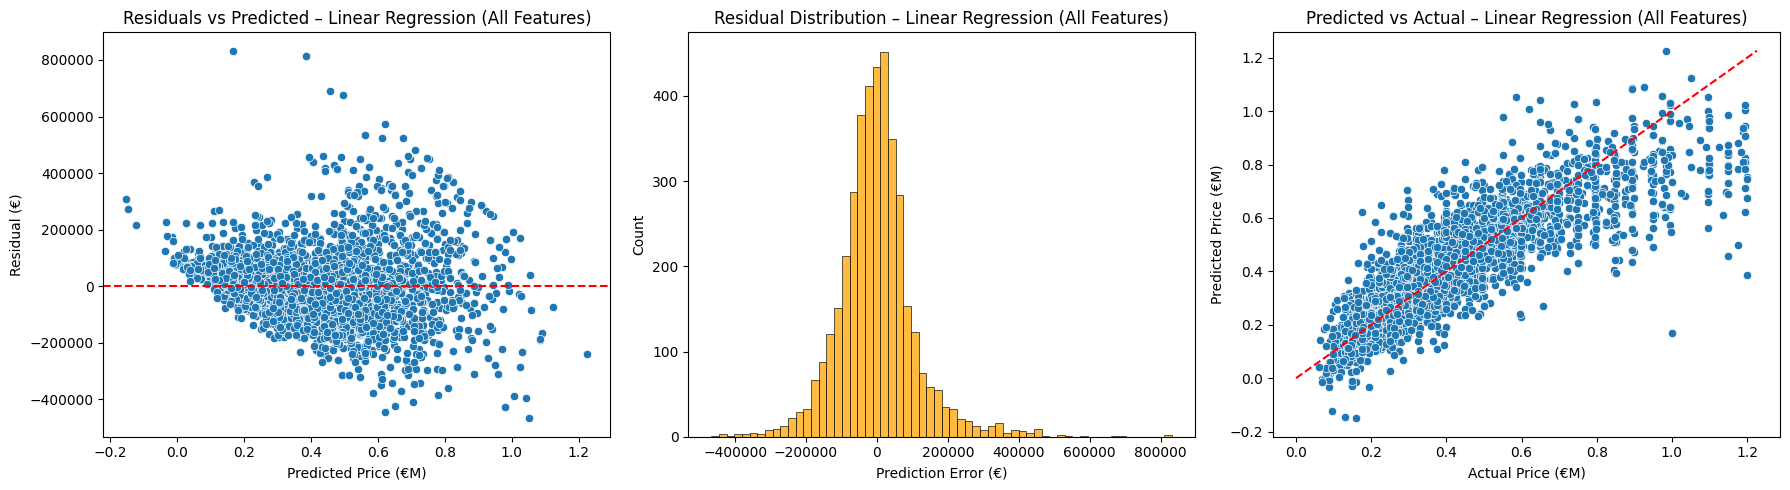

E:\_SoftEng\_BeCode\real-estate-price-predictor\utils\model_visualizer.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="residuals", data=df, palette="muted")


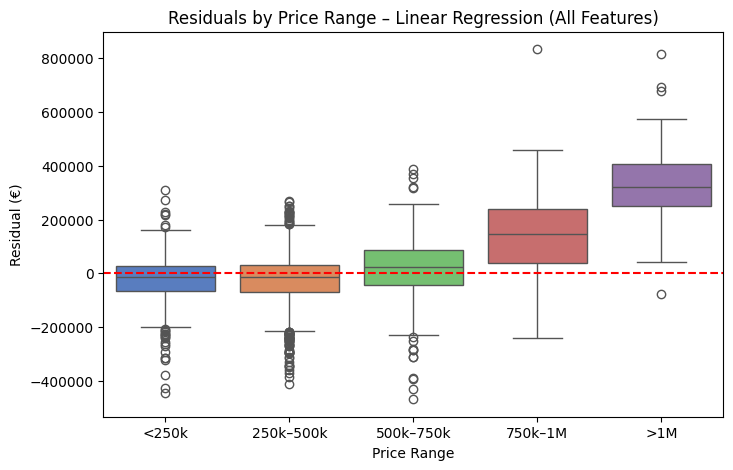

In [3]:
# === Imports ===
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

from utils.model_evaluator import ModelEvaluator
from utils.experiment_tracker import ExperimentTracker
from utils.model_visualizer import ModelVisualizer

# === Step 1: Train the Linear Regression model ===
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# === Step 2: Predict on the test set ===
y_pred_lr = lr_model.predict(X_test)

# === Step 3: Evaluate performance manually ===
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# === Step 4: Evaluation using ModelEvaluator (for console + logging) ===
evaluator = ModelEvaluator("Linear Regression (All Features)")
evaluator.evaluate(y_test, y_pred_lr)  # Already prints the scores

# === Step 5: Log metrics and display summary table ===
tracker = ExperimentTracker()
df_metrics = tracker.log_and_get_evaluations(
    model="Linear Regression (All Features)",
    experiment="Linear Regression (All Features)",
    mae=mae_lr,
    rmse=rmse_lr,
    r2=r2_lr
)

# Display summary of all evaluations so far
evaluator.display_model_summary(df_metrics)

# === Step 6: Visual diagnostics ===
print("\n--- Linear Regression Visualizations ---")
visualizer = ModelVisualizer(lr_model, X_test, y_test, model_name="Linear Regression (All Features)")
visualizer.plot_all_diagnostics()
visualizer.plot_price_range_residuals()

# === Step 7: Optional plots (use only if supported) ===
# visualizer.plot_permutation_importance(scoring="neg_mean_absolute_error", n_repeats=15)
# visualizer.plot_shap_summary()


Evaluation – Linear Regression (All Features)
  MAE:  76,898.76 €
  RMSE: 109,935.46 €
  R²:   0.7230
----------------------------------------
Model evaluation for 'Linear Regression (All Features)' already exists. Skipping log.
=== Model Evaluation Summary ===


,id,timestamp,model,dataset,experiment,cleaning_version_id,mae,rmse,r2,type,rank_r2,rmse/mae,best
0,32,2025-06-29 01:01:09,Linear Regression (All Features),immoweb_real_estate_cleaned_for_ml_20250629_0100.csv,Linear Regression (All Features),202506290100,76 898.76 €,109 935.46 €,0.723000,Linear,1,1.430000,✓



👉 Best model based on R²: Linear Regression (All Features) ✓


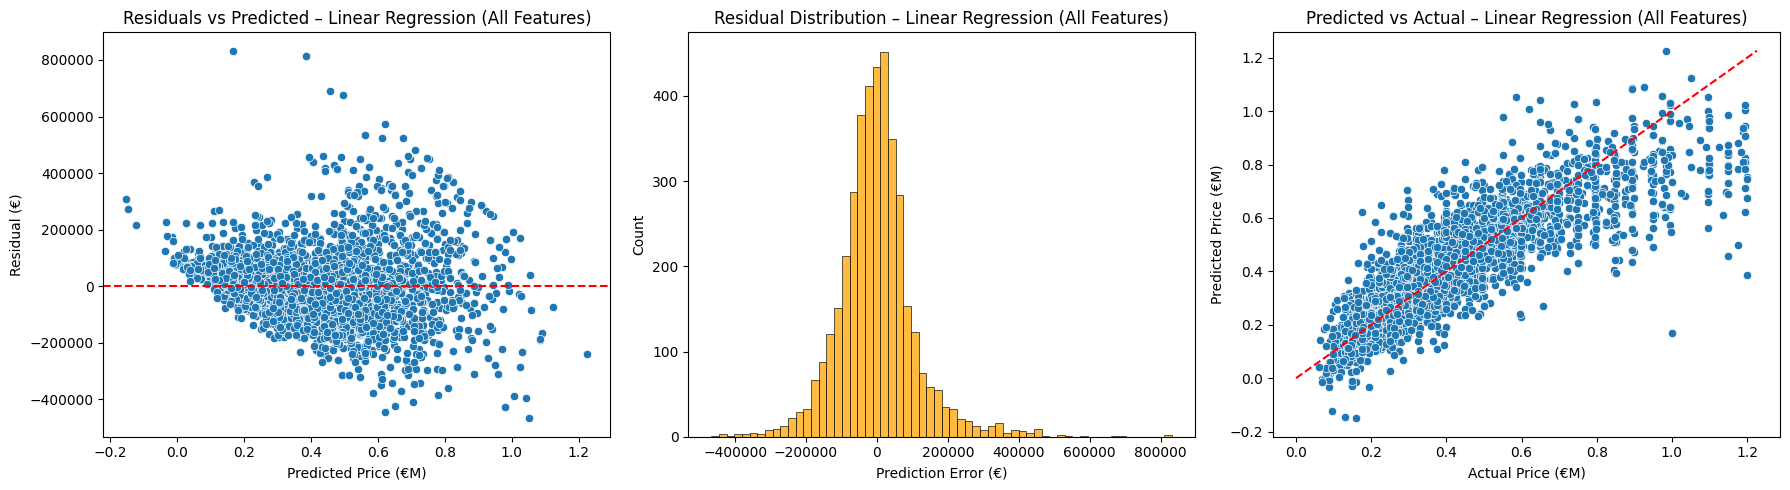

E:\_SoftEng\_BeCode\real-estate-price-predictor\utils\model_visualizer.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="residuals", data=df, palette="muted")


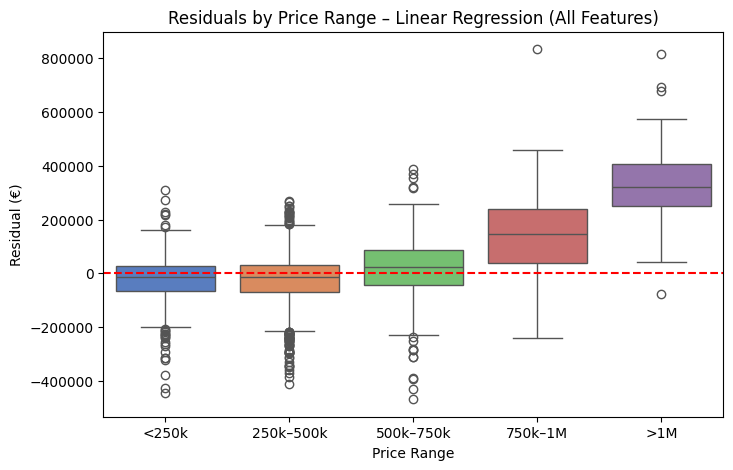

In [4]:
from sklearn.linear_model import LinearRegression
from utils.model_evaluator import ModelEvaluator

# === Step 1: Train Linear Regression model ===
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# === Step 2: Predict on test set ===
y_pred = lr_model.predict(X_test)

# === Step 3: Evaluate and track results ===
evaluator = ModelEvaluator("Linear Regression (All Features)")

evaluator.evaluate_and_track_model(
    model=lr_model,
    X_test=X_test,
    y_test=y_test,
    y_pred=y_pred,
    model_name="Linear Regression (All Features)",         
    experiment_name="Linear Regression (All Features)"           
)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from utils.data_loader import DataLoader
from utils.constants import ML_READY_DATA_FILE  

# === Define RMSE manually ===
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# === Step 1: Load and clean dataset ===
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()  # Remplace pd.read_csv(...)
df = df.dropna()

# Separate features and target
X = df.drop(columns=["price"])
y = df["price"]

# === Step 2: Remove low-variance features ===
selector = VarianceThreshold(threshold=0.01)
X_reduced_array = selector.fit_transform(X)
X_reduced = pd.DataFrame(X_reduced_array, columns=X.columns[selector.get_support()])

print(f"Initial shape: {X.shape}, Reduced shape: {X_reduced.shape}")

# === Step 3: Train models on all reduced features ===
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

lr_model_all = LinearRegression()
rf_model_all = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

lr_model_all.fit(X_train_all, y_train_all)
rf_model_all.fit(X_train_all, y_train_all)

# Predictions
y_pred_lr_all = lr_model_all.predict(X_test_all)
y_pred_rf_all = rf_model_all.predict(X_test_all)

# === Step 4: Feature importance from Random Forest ===
feature_importances = pd.DataFrame({
    "feature": X_reduced.columns,
    "importance": rf_model_all.feature_importances_
}).sort_values(by="importance", ascending=False)

top_features = feature_importances.head(10)["feature"].tolist()
print(f"Top 10 selected features (Random Forest): {top_features}")

# === Step 5: Train models on top 10 features ===
X_top = X_reduced[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

lr_model_top = LinearRegression()
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

lr_model_top.fit(X_train_top, y_train_top)
rf_model_top.fit(X_train_top, y_train_top)

# Predictions on reduced set
y_pred_lr_top = lr_model_top.predict(X_test_top)
y_pred_rf_top = rf_model_top.predict(X_test_top)


Initial shape: (20139, 2892), Reduced shape: (20139, 72)


Top 10 selected features (Random Forest): ['bathroomCount', 'habitableSurface', 'postCode', 'toiletCount', 'buildingConstructionYear', 'building_age', 'locality_Knokke-Heist', 'surface_per_room', 'facedeCount', 'kitchenType_HYPER_EQUIPPED']


Evaluation – Random Forest (All Features)
  MAE:  68,324.02 €
  RMSE: 101,428.25 €
  R²:   0.7642
----------------------------------------
[✓] Model evaluation for 'Random Forest (All Features)' logged.
=== Model Evaluation Summary ===


,id,timestamp,model,dataset,experiment,cleaning_version_id,mae,rmse,r2,type,rank_r2,rmse/mae,best
0,32,2025-06-29 01:01:09,Linear Regression (All Features),immoweb_real_estate_cleaned_for_ml_20250629_0100.csv,Linear Regression (All Features),202506290100,76 898.76 €,109 935.46 €,0.723000,Linear,2,1.430000,
1,33,2025-06-29 01:01:34,Random Forest (All Features),immoweb_real_estate_cleaned_for_ml_20250629_0100.csv,Random Forest (All Features),202506290100,68 324.02 €,101 428.25 €,0.764200,Tree,1,1.480000,✓



👉 Best model based on R²: Random Forest (All Features) ✓


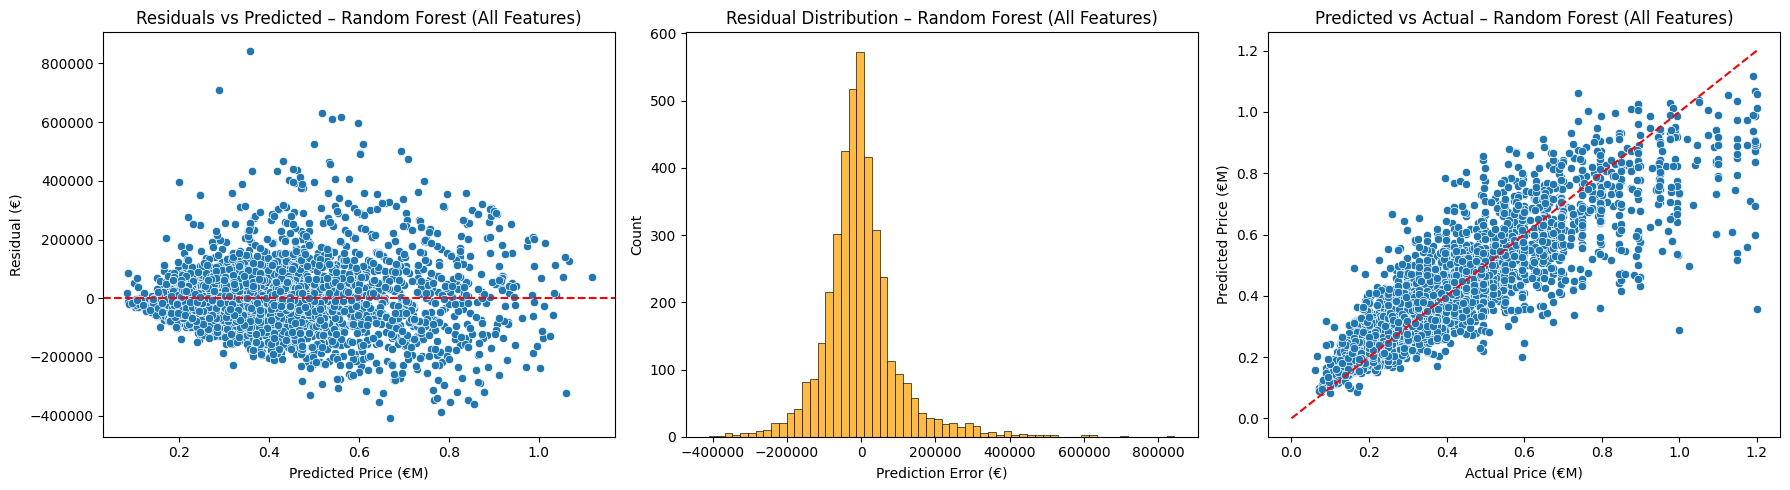

E:\_SoftEng\_BeCode\real-estate-price-predictor\utils\model_visualizer.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="residuals", data=df, palette="muted")


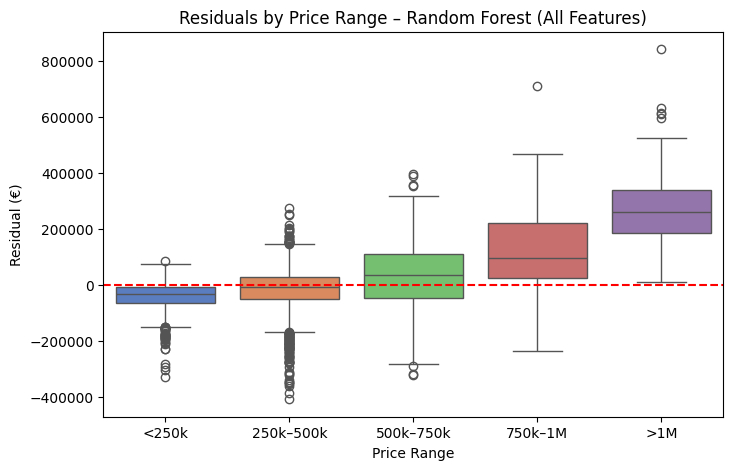

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from utils.data_loader import DataLoader
from utils.model_evaluator import ModelEvaluator
from utils.constants import ML_READY_DATA_FILE

# === Load dataset via DataLoader ===
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

# === Separate features and target ===
X = df.drop(columns=["price"])
y = df["price"]

# === Remove low variance features ===
selector = VarianceThreshold(threshold=0.01)
X_reduced_array = selector.fit_transform(X)
X_reduced = X.iloc[:, selector.get_support()]

# === Split data ===
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# === Train models ===
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# === Predict ===
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# === Evaluate & track (Random Forest) ===
evaluator_rf = ModelEvaluator("Random Forest (All Features)")
evaluator_rf.evaluate_and_track_model(
    model=rf_model,
    X_test=X_test,
    y_test=y_test,
    y_pred=y_pred_rf,
    model_name="Random Forest (All Features)",
    experiment_name="Random Forest (All Features)"
)


Top 10 selected features (Random Forest): ['habitableSurface', 'bathroomCount', 'postCode', 'toiletCount', 'buildingConstructionYear', 'locality_Knokke-Heist', 'building_age', 'surface_per_room', 'facedeCount', 'kitchenType_HYPER_EQUIPPED']



--- Random Forest Evaluation (Top 10 Features) ---
Evaluation – Random Forest (Top 10 Features)
  MAE:  71,734.61 €
  RMSE: 106,140.03 €
  R²:   0.7418
----------------------------------------
[✓] Model evaluation for 'Random Forest (Top 10 Features)' logged.
=== Model Evaluation Summary ===


,id,timestamp,model,dataset,experiment,cleaning_version_id,mae,rmse,r2,type,rank_r2,rmse/mae,best
0,32,2025-06-29 01:01:09,Linear Regression (All Features),immoweb_real_estate_cleaned_for_ml_20250629_0100.csv,Linear Regression (All Features),202506290100,76 898.76 €,109 935.46 €,0.723000,Linear,3,1.430000,
1,33,2025-06-29 01:01:34,Random Forest (All Features),immoweb_real_estate_cleaned_for_ml_20250629_0100.csv,Random Forest (All Features),202506290100,68 324.02 €,101 428.25 €,0.764200,Tree,1,1.480000,✓
2,34,2025-06-29 01:01:43,Random Forest (Top 10 Features),immoweb_real_estate_cleaned_for_ml_20250629_0100.csv,Random Forest (Top 10 Features),202506290100,71 734.61 €,106 140.03 €,0.741800,Tree,2,1.480000,



👉 Best model based on R²: Random Forest (All Features) ✓

--- Random Forest Visualizations (Top 10 Features) ---


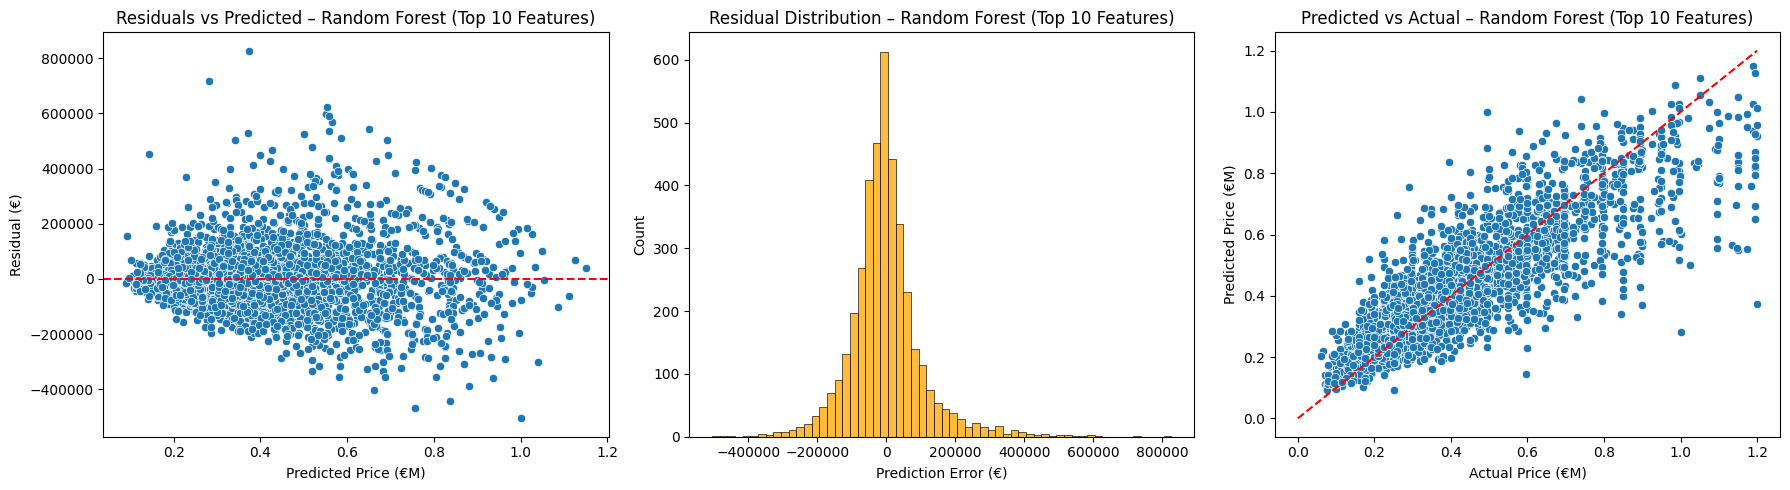

E:\_SoftEng\_BeCode\real-estate-price-predictor\utils\model_visualizer.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y="residuals", data=df, palette="muted")


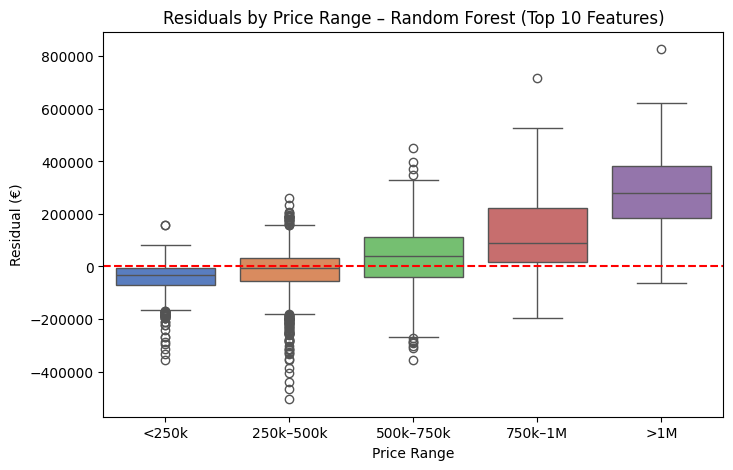

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

from utils.data_loader import DataLoader
from utils.model_evaluator import ModelEvaluator
from utils.model_visualizer import ModelVisualizer
from utils.experiment_tracker import ExperimentTracker
from utils.constants import ML_READY_DATA_FILE

# === Step 1: Load and clean dataset ===
loader = DataLoader(ML_READY_DATA_FILE)
df = loader.load_data()

X = df.drop(columns=["price"])
y = df["price"]

# Remove low-variance features (e.g., mostly 0 dummy variables)
selector = VarianceThreshold(threshold=0.01)
X_reduced_array = selector.fit_transform(X)
X_reduced = X.loc[:, selector.get_support()]

# === Step 2: Train Random Forest to get top 10 features ===
rf_model_all = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_all.fit(X_reduced, y)

# Get top 10 most important features
feature_importances = pd.DataFrame({
    "feature": X_reduced.columns,
    "importance": rf_model_all.feature_importances_
}).sort_values(by="importance", ascending=False)

top_features = feature_importances.head(10)["feature"].tolist()
print(f"Top 10 selected features (Random Forest): {top_features}")

# === Step 3: Split dataset on top 10 features ===
X_top = X_reduced[top_features]
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# === Step 4: Train new Random Forest on top 10 features ===
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model_top.fit(X_train_top, y_train_top)

# === Step 5: Predict ===
y_pred_rf_top = rf_model_top.predict(X_test_top)

# === Step 6: Evaluate ===
evaluator_rf = ModelEvaluator("Random Forest (Top 10 Features)")

print("\n--- Random Forest Evaluation (Top 10 Features) ---")
mae_rf_top, rmse_rf_top, r2_rf_top = evaluator_rf.evaluate(y_test_top, y_pred_rf_top)

# === Step 7: Log metrics and show summary ===
tracker = ExperimentTracker()
df_metrics_rf_top10 = tracker.log_and_get_evaluations(
    model="Random Forest (Top 10 Features)",
    experiment="Random Forest (Top 10 Features)",
    mae=mae_rf_top,
    rmse=rmse_rf_top,
    r2=r2_rf_top,
)

evaluator_rf.display_model_summary(df_metrics_rf_top10)

# === Step 8: Visualizations ===
print("\n--- Random Forest Visualizations (Top 10 Features) ---")
visualizer_rf = ModelVisualizer(rf_model_top, X_test_top, y_test_top, model_name="Random Forest (Top 10 Features)")
visualizer_rf.plot_all_diagnostics()
visualizer_rf.plot_price_range_residuals()
